# Сборный проект: Прогнозирование рынка видеоигр

**Шаги по выполнению проекта**

**Шаг 1. Откройте файл с данными и изучите общую информацию** 

Путь к файлу: /datasets/games.csv.

**Шаг 2. Подготовьте данные**

Замените названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму 
рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

1) Самые популярные платформы (топ-5). Опишите различия в долях продаж.

2) Самые популярные жанры (топ-5). Поясните разницу.

3) Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

Как вы сформулировали нулевую и альтернативную гипотезы;

Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Напишите общий вывод**

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

# Шаг 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
# импортирую библиотеки

In [2]:
data_game = pd.read_csv('/datasets/games.csv')
data_game.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Text(0.5, 1.0, 'Пропуски в данных')

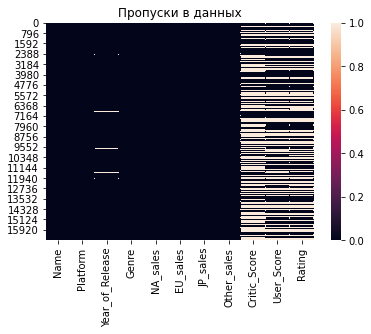

In [4]:
sns.heatmap(data_game.isna())
plt.title('Пропуски в данных')
# Хитмап по пропускам в данных.

In [5]:
data_game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Заметно большое колличесво пропусков в рейтингах и оценках пользователей и критиков.

Формат записи у оценки пользователей и рейтинга нужно сменить на 'float64'.

Формат записи года релиза, нужно сменить на 'int' (у нас есть только год, поэтому решил не переводить в дату, к тому же есть пустые значения, они не могут быть заполнены медианой, поэтому будут исключены или же заменены на "0")

Нужно привести название столбцов к нижниму регистру.

# Шаг 2.

Приведем столбцы к нижниму регистру и проверим результат

In [6]:
data_game.columns = data_game.columns.str.lower()
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Удаление строк**

В столбце с именем всего 2 пропуска, ничего не изменится если мы удалим их

В столбце с жанром всего 2 пропуска, ничего не изменится если мы удалим их

Пропусков в годе релиза немного, имеет смысл отбросить эти данные.

In [7]:
data_game = data_game[~data_game['name'].isnull()]

In [8]:
data_game = data_game[~data_game['genre'].isnull()]

In [9]:
data_game = data_game[~data_game['year_of_release'].isnull()]

**Замена типа данных в столбце с годом релиза**

In [10]:
data_game['year_of_release'] = data_game['year_of_release'].astype(int)

У нас нет точной даты, только год, поэтому удобнее будет перевести тип в 'int'

**Замена пропусков в стобце с возрастынми рейтингом**

Посмотрим на уникальные значения.

Заполним пустые значения на 'no_rating', пропусков в этом столбце очень много, их удаление повлияет на результат.

Медианным или средним заполнить пропуски невозможно, да и смысла не имеет.

In [11]:
data_game['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
data_game['rating'] = data_game['rating'].fillna('no_rating')

**Оценки пользователей**

Посмотрим на уникальные значения.
С 'nan' все ясно, но есть еще и 'tbd'
to be determined = будет определено, оценка еще не присвоена.
Так как оценки нет, можно предположить что пока что рейтинг равен нулю, сложно опредилить с чем это связано.
Мы не знаем каким способом присваевается оценка пользователей, с одного ли ресурса взяты данные или это среднее значения собранные из нескольких источников.
Менять строки с 'tbd', на среднее значение не имеет смысла, данные слишком разные, в одном жанре или на одной платформе, оценка пользователй может сильно разнится.

In [13]:
data_game['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data_game['user_score'].isna().sum()

6605

Колличесво пропусков.

In [15]:
data_game['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.7       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Помимо пропуков самое большое колличество значений 'tbd'

In [16]:
data_game['user_score']= data_game['user_score'].str.replace('tbd', '0')

In [17]:
data_game['user_score'] = data_game['user_score'].astype('float64')

In [18]:
data_game['user_score'] = data_game['user_score'].fillna(0)

Для присвоения "tbd" значения ноль применен 'str.replace', так как у столбца тип 'object'.
Затем в столбце зменен тип данных на 'float64' и пропуски заполнены нулевым значением.

**Оценки критиков**

In [19]:
data_game['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Проверим уникальные значения.

In [20]:
data_game['critic_score'] = data_game['critic_score'] / 10

Я решил разделить значения в столбце на 10, чтобы оценки критиков, стали похожи на оценки пользователей.

In [21]:
data_game['critic_score'].unique()

array([7.6, nan, 8.2, 8. , 8.9, 5.8, 8.7, 9.1, 6.1, 9.7, 9.5, 7.7, 8.8,
       8.3, 9.4, 9.3, 8.5, 8.6, 9.8, 9.6, 9. , 8.4, 7.3, 7.4, 7.8, 9.2,
       7.1, 7.2, 6.8, 6.2, 4.9, 6.7, 8.1, 6.6, 5.6, 7.9, 7. , 5.9, 6.4,
       7.5, 6. , 6.3, 6.9, 5. , 2.5, 4.2, 4.4, 5.5, 4.8, 5.7, 2.9, 4.7,
       6.5, 5.4, 2. , 5.3, 3.7, 3.8, 3.3, 5.2, 3. , 3.2, 4.3, 4.5, 5.1,
       4. , 4.6, 3.9, 3.4, 4.1, 3.6, 3.1, 2.7, 3.5, 2.6, 1.9, 2.8, 2.3,
       2.4, 2.1, 1.7, 1.3])

Проверяю

In [22]:
data_game['critic_score'] = data_game['critic_score'].fillna(0)


Заменим пустые значения на '0'

**Добавление нового столбца с суммой продаж всех регионов**

In [23]:
data_game['world_sale'] = data_game['na_sales'] + data_game['eu_sales'] + data_game['jp_sales'] + data_game['other_sales']

In [24]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  world_sale       16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Проверим, новый столбец добавлен, пропуски устранены, лишние строки отброшены.

**В ходе выполнения предобработки:** 

1) Имена столбцов были приведены к змеиному регистру. 

2) Отброшены строки с пропусками, где это было возможно, в ином случае произведена замена.

3) Был изменен тип данных в столбцах, для дальнейшего взаимодействия.

4) Добавлен столбец с мировыми продажами.

**Возможные причины появления пропусков:** 

Пропуски в оценках критиков и пользователей могли появиться из-за того что не всегда играм давали оценки критики, а оценки пользователей могли не собираться, это косается старых игр. У современых игр эти пропуски могли возникнуть из-за неправильной выгрузки или же оценки еще не присвоены. Допустим в таблице есть сумма продаж, а оценок нет но это предзаказ.

Пропуски в жанре и имени, скорее всего свзаны с выгрузкой.

Пропуки в рейтинге могут быть связаны с тем, что игра выпускалась до появления рейтинга или же вовсе не присваивалась. Так же возможно, что рейтинг в процессе присвоения. 

# Шаг 3.

Text(0.5, 1.0, 'Колличество релизов игр по годам')

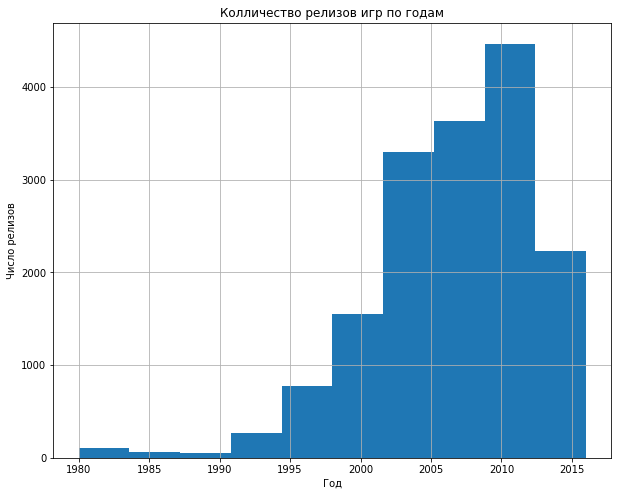

In [25]:
data_game['year_of_release'].hist(bins=10, figsize=(10,8)).set(xlabel='Год', ylabel='Число релизов')
plt.title('Колличество релизов игр по годам')

Начиная с 1991/92 года, появляется все больше и больше игр, это связано с бурным ростом индустрии и вовличенностью крупного капитала. с 2012 года колличество релизов резко падает, могу с увереностю предположить, что это связано с увеличением колличества игр на всем известной платформе, но которая не представленна в данных, а имеено 'Mobile', что логично, так как аудитория очень большая, затраты на производство меньше, а реклама и микротранзакции обеспечивают постоянный доход. 

In [26]:
platform_sale = data_game.groupby(by='platform').agg({'world_sale':'sum'}).sort_values(by='world_sale', ascending=False).head()
platform_sale
# Сгрупируем по данные по самому большому колличеству продаж.

,world_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Text(0.5, 1.0, 'PS2 продажи игр по годам')

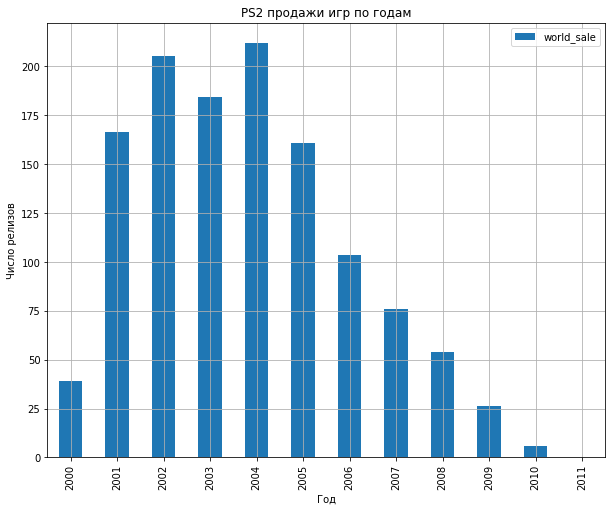

In [27]:
(data_game
    .query('platform=="PS2"')
    .pivot_table(index='year_of_release', values='world_sale', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
)
plt.title('PS2 продажи игр по годам')
# Гистограмм суммарных продаж по годам для 5 самых популярных платформ.

PlayStation 2 это легендарная консоль, но все рано или поздно устаревает, ее мощностей со временем недостаточно.
Продажи игр были на высоких уровнях с 2001 по 2005. С 2006 года же продажи начали снижаться, консоль на тот момент уже была старая, да и выход нового поколения состоявшиеся в этом же году повлиял на продажи. 

Text(0.5, 1.0, 'X360 продажи игр по годам')

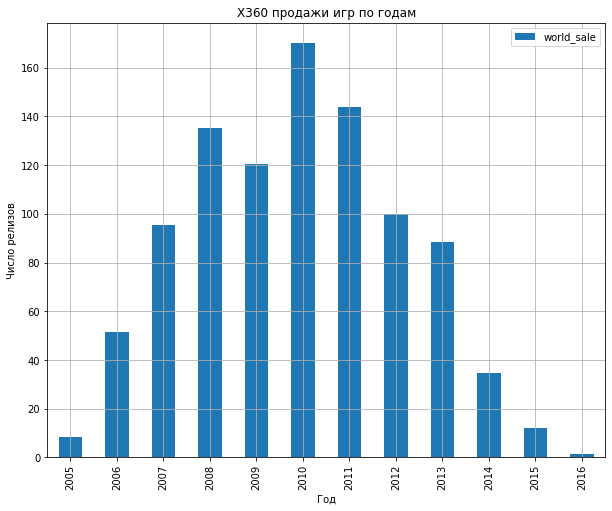

In [28]:
(data_game
    .query('platform=="X360"')
    .pivot_table(index='year_of_release', values='world_sale', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
)
plt.title('X360 продажи игр по годам')

С момента выхода Xbox 360, продажа игр росла до 2011 года, тогда начался спад интереса к этой платформе, самый низкий показатель продаж пришелся на последний год поддержки. Значитильный спад наблюдается с 2014 года, в этом году вышло следующие поколение и падение спроса совершенно логично.

Text(0.5, 1.0, 'PS3 продажи игр по годам')

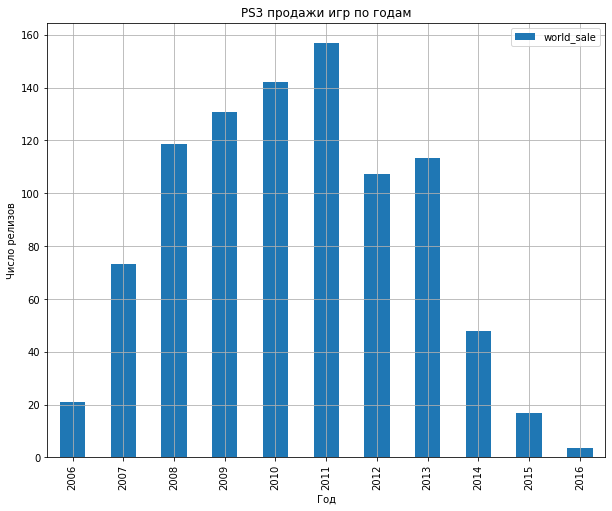

In [29]:
(data_game
    .query('platform=="PS3"')
    .pivot_table(index='year_of_release', values='world_sale', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
)
plt.title('PS3 продажи игр по годам')

Продажи игр на PlayStation 3, уверено росли до 2012 года, позже в 2013 был незначительный рост продаж, а в 2014 когда вышло следующие поколение, продажи начали падать и в 2016 году на последнем году поддержки, продажи были самыми низкими. 

Text(0.5, 1.0, 'Wii продажи игр по годам')

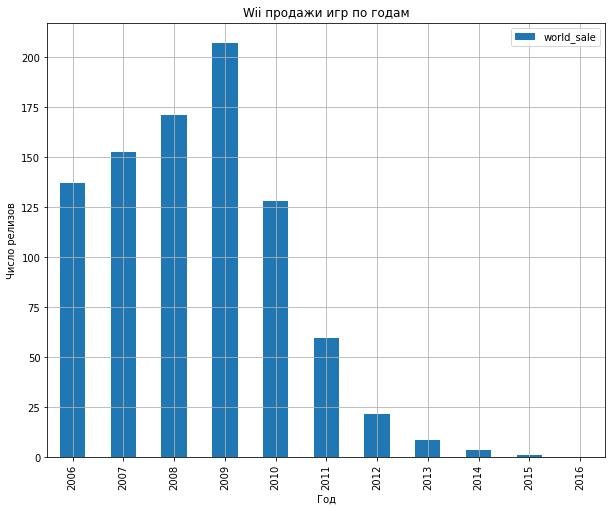

In [30]:
(data_game
    .query('platform=="Wii"')
    .pivot_table(index='year_of_release', values='world_sale', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
)
plt.title('Wii продажи игр по годам')

Продажи на консоли Wii, с самого старта начали показывать хорошие результаты и до 2010 только росли.  В 2010 был резкий спад продаж, в дальнейшем каждый последущий год продажи сокращались примерно в двое.

Text(0.5, 1.0, 'DS продажи игр по годам')

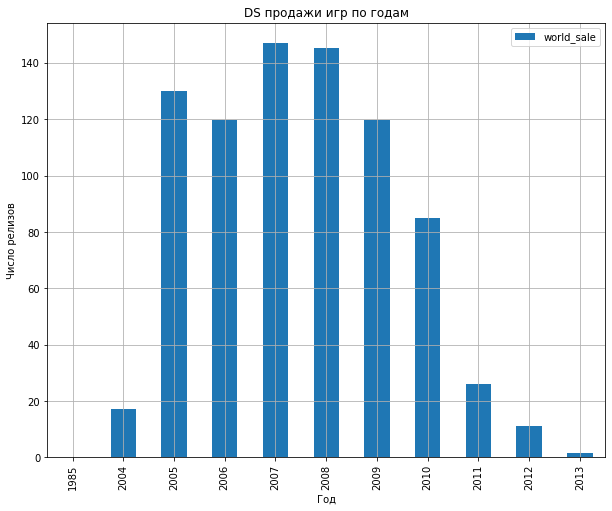

In [31]:
(data_game
    .query('platform=="DS"')
    .pivot_table(index='year_of_release', values='world_sale', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
)
plt.title('DS продажи игр по годам')

Очень большой разброс по годам, возможно в данных собраны разные версии этой консоли включая вышедшую в 1985 году Nintendo Entertainment System и версии Lite, DSi и DSi XL (учитывая мои знания, покупка одной игры несколько несколько раз на разные версий консоли вполне возможна, что могло отразится на продажах). Резки рост продаж пришелся на 2005 год, существеный спад начался 2011, самые низкие продажи были в 2013.

In [32]:
def pl_life(name):
    min_y=name['year_of_release'].min()
    max_y=name['year_of_release'].max()
    life = max_y - min_y
    return life

# Решил воспользоваться функцией для подсчёта времени жизни консоли

In [33]:
ps2=data_game.query('platform=="PS2"')
ps2 = pl_life(ps2)
ps2

11

In [34]:
x360=data_game.query('platform=="X360"')
x360 = pl_life(x360)
x360

11

In [35]:
ps3=data_game.query('platform=="PS3"')
ps3 = pl_life(ps3)
ps3

10

In [36]:
wii = data_game.query('platform=="Wii"')
wii = pl_life(wii)
wii

10

In [37]:
ds = data_game.query('platform=="DS"and year_of_release!=1985')
ds = pl_life(ds)
ds
# Исключил 1985 год, по причине описанной выше.

9

In [38]:
mean_pl_life = (ps2 + ps3 + x360 + wii + ds) / 5
mean_pl_life

10.2

Получаеться в среднем время жизни консоли составляет 10 лет.

In [39]:
rev_data_game = data_game.query('year_of_release>=2007').reset_index()
rev_data_game
# Учитывая среднее время жизни консолей, я решил взять отрезок в 10 лет, кроме того он охватывает два поколения основных платформ консолей.

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sale
0,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
1,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
2,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.7,8.4,E,28.32
3,13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,8.0,7.7,E,22.70
4,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,6.1,6.3,E,21.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9322,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,no_rating,0.01
9323,16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.0,0.0,no_rating,0.00
9324,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,no_rating,0.01
9325,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,no_rating,0.01


Text(0.5, 1.0, 'Продажи игр с 2007 года')

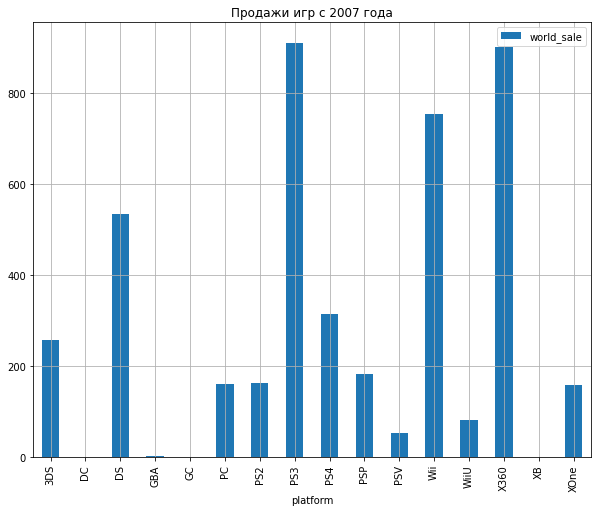

In [40]:
rev_data_game.pivot_table(index='platform', values='world_sale', aggfunc=sum).plot(grid=True, kind='bar',figsize=(10, 8))
plt.title('Продажи игр с 2007 года')

Среди лидеров сохранились все кроме "PS2", появилась "3DS", можно было бы взять эти данные, но стоит понимать, что некоторые платформы, находятся на закате своего существования, либо же их поддержка уже прекращена. Стоит пересмотреть выборку по годам. 

In [41]:
rev_data_game = data_game.query('year_of_release>=2011 and platform!="PS3" and platform!="X360" and platform!="PS2" and platform!="DS" and platform!="Wii"').reset_index(drop=True)
rev_data_game
# Возьмем период с 2011 года отбросив седьмое поколение консолей (PS3 и X360) и предыдущие модели, так как их жизненый цикл закончен.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,no_rating,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,no_rating,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,8.5,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,no_rating,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
2423,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,6.0,7.2,E10+,0.01
2424,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,no_rating,0.01
2425,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,no_rating,0.01
2426,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,no_rating,0.01


Text(0.5, 1.0, 'Продажи игр с 2011 года')

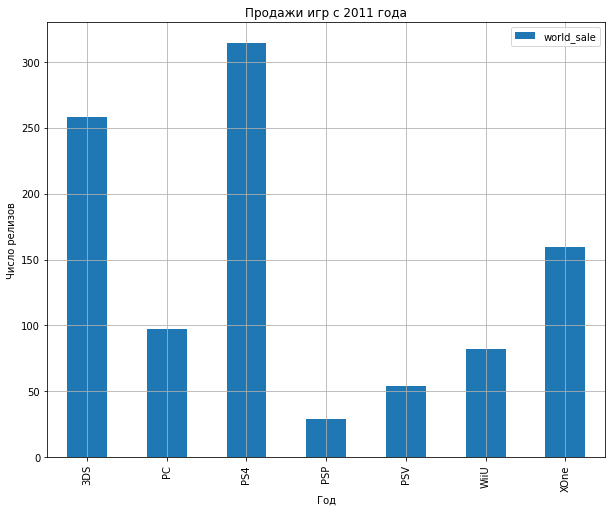

In [42]:
rev_data_game.pivot_table(index='platform', values='world_sale', aggfunc=sum).plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
plt.title('Продажи игр с 2011 года')

Мы получили актуальный график по продажам игр, наиболее прибыльными являются четыре платформы: 

1) PS4

2) 3DS

3) XOne

4) PC


Text(0.5, 1.0, 'Разброс мировых продаж')

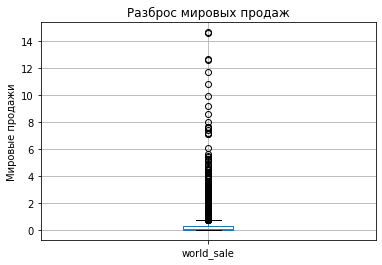

In [43]:
rev_data_game.boxplot(column=['world_sale']).set(ylabel='Мировые продажи')
plt.title('Разброс мировых продаж')
# В отношении  данным есть выбросы, но учитывапя специфику, отбрасывать их нельзя (к примеру у нас есть GTA и FIFA, у этих игр всегда очень большии продажи).

In [44]:
rev_data_game.pivot_table(index='platform', values='world_sale', aggfunc=['mean', 'median'])
# Средний и медианный показатель продаж.

,mean,median
,world_sale,world_sale
platform,,
3DS,0.503535,0.12
PC,0.251105,0.08
PS4,0.801378,0.20
PSP,0.092981,0.04
PSV,0.125431,0.05
WiiU,0.559116,0.22
XOne,0.645020,0.22


In [45]:
rev_data_game.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sale
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000
mean,2013.647858,0.151215,0.144407,0.072409,0.041343,3.258072,3.259102,0.409374
std,1.746610,0.440182,0.431987,0.262418,0.125745,3.678604,3.523604,1.070681
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2014.000000,0.010000,0.020000,0.010000,0.010000,0.000000,0.000000,0.100000
75%,2015.000000,0.110000,0.100000,0.060000,0.030000,7.200000,7.000000,0.310000
max,2016.000000,6.030000,6.310000,4.390000,2.380000,9.700000,9.300000,14.630000


In [46]:
rev_data_game['platform'].unique()
# В дальнейшем данные будут расмотрены с 2011 года, поэтому отобраны только актуальные консоли 

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'PSP'], dtype=object)

In [47]:
def lip(data):
    data.pivot_table(index='year_of_release', values='world_sale', aggfunc=sum).plot(grid=True, kind='bar',figsize=(10, 8)).set(xlabel='Год', ylabel='Число релизов')
    plt.title('Продажи игр по годам')
    
# Функция для построения графика

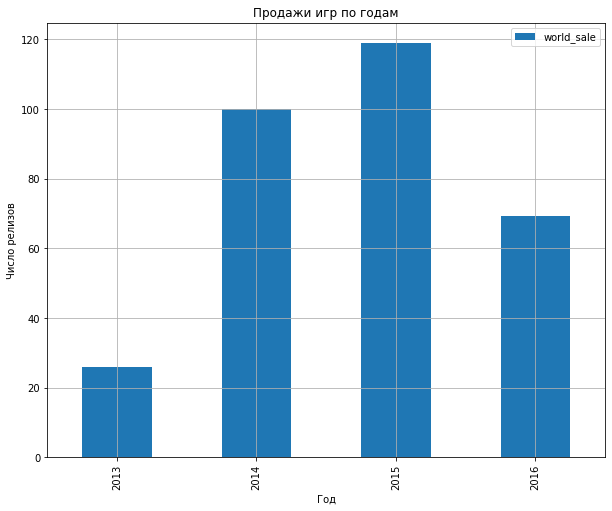

In [48]:
ps4_y = rev_data_game.query('platform=="PS4"')
lip(ps4_y)

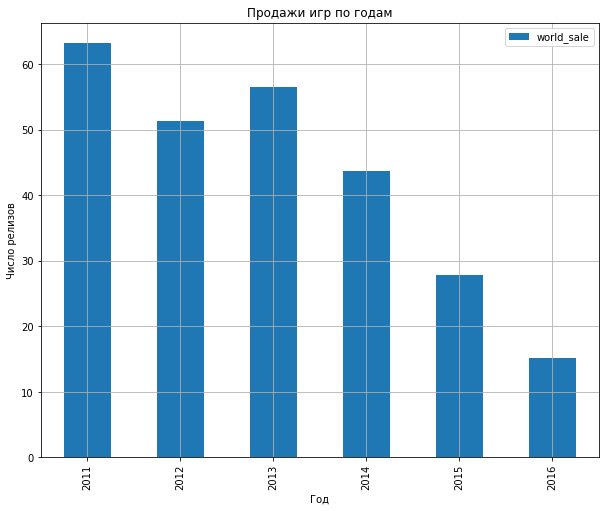

In [49]:
_3ds_y = rev_data_game.query('platform=="3DS"')
lip(_3ds_y)

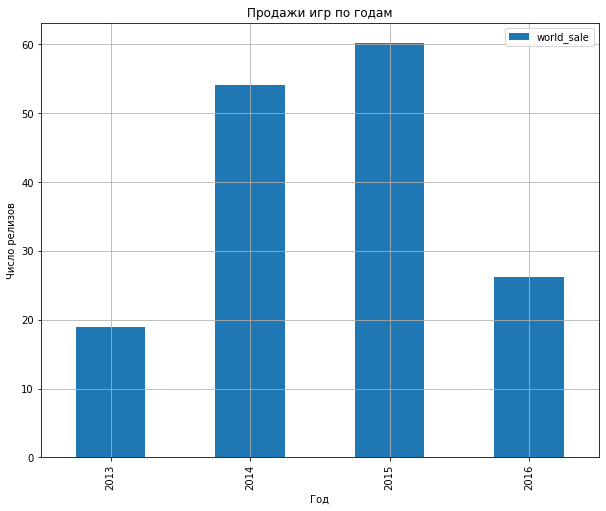

In [50]:
xone_y = rev_data_game.query('platform=="XOne"')
lip(xone_y)

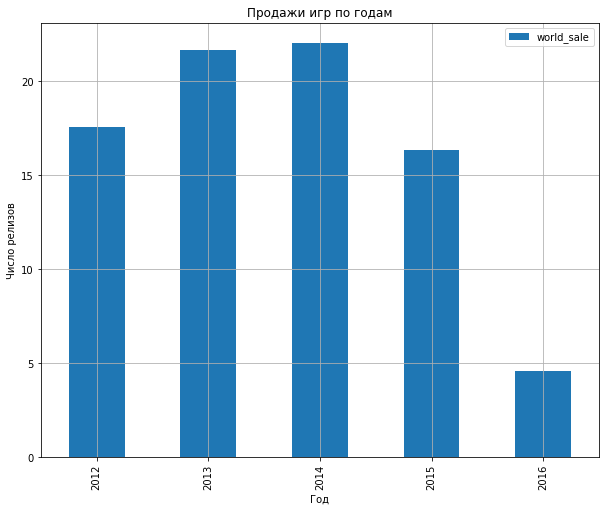

In [51]:
wiiu_y = rev_data_game.query('platform=="WiiU"')
lip(wiiu_y)

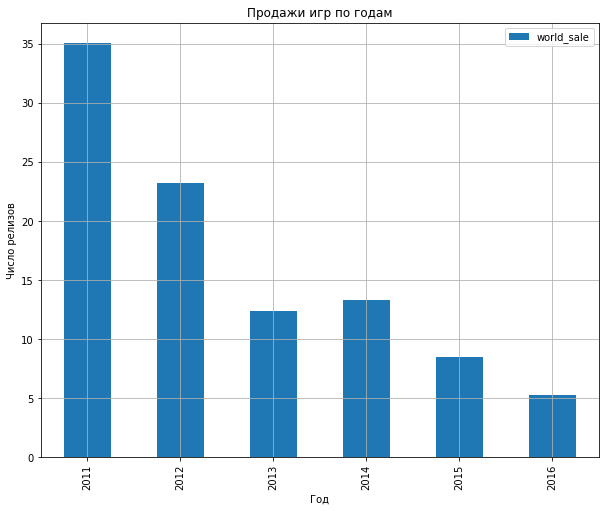

In [52]:
pc_y = rev_data_game.query('platform=="PC"')
lip(pc_y)

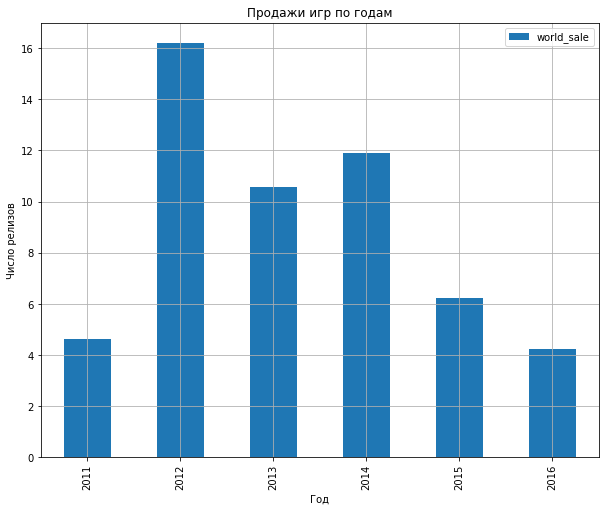

In [53]:
psv_y = rev_data_game.query('platform=="PSV"')
lip(psv_y)

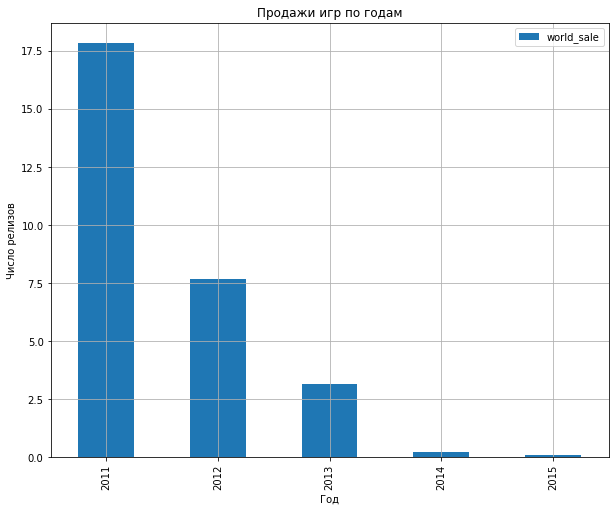

In [54]:
psp_y = rev_data_game.query('platform=="PSP"')
lip(psp_y)

Получили очевидный результат, самыми прибыльными являются консоли: "PS4", "XOne", "3DS". 

В 2016 у всех наблюдаются падения, скорее всего это связано с недостатком данных на этот год.


<AxesSubplot:xlabel='platform', ylabel='world_sale'>

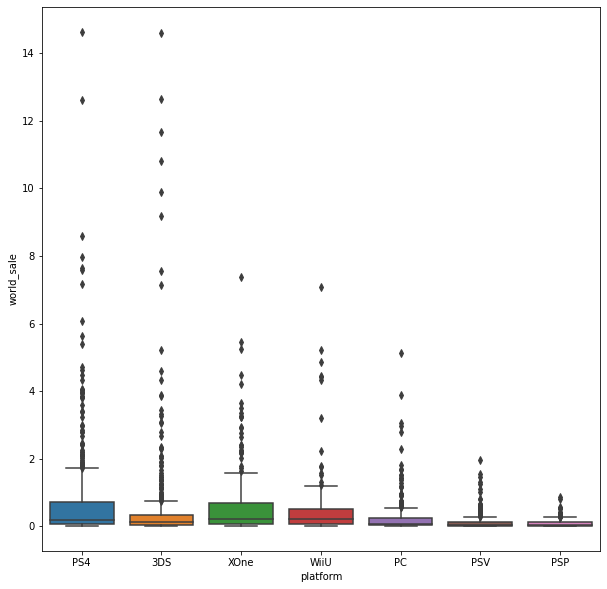

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'world_sale', data = rev_data_game)

Мировые продажи консолей PS4 и XOne, самые большие, что соответсвует реалиям рынка. Рынок PC, что интересно далеко не в первых рядах, несмотря на то что компьютеры почти в каждом доме.

# Оценка влияния оценки пользователей и критиков на продажи

In [56]:
game_corr = data_game[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales', 'world_sale']].corr()
game_corr

,critic_score,user_score,na_sales,eu_sales,jp_sales,world_sale
critic_score,1.000000,0.818365,0.153382,0.170641,-0.042975,0.148656
user_score,0.818365,1.000000,0.139281,0.152252,-0.031679,0.136181
na_sales,0.153382,0.139281,1.000000,0.766546,0.451162,0.941241
eu_sales,0.170641,0.152252,0.766546,1.000000,0.435894,0.901673
jp_sales,-0.042975,-0.031679,0.451162,0.435894,1.000000,0.613305
world_sale,0.148656,0.136181,0.941241,0.901673,0.613305,1.000000


Зависимость между оценками критиков и пользователей минимальна

<AxesSubplot:xlabel='critic_score'>

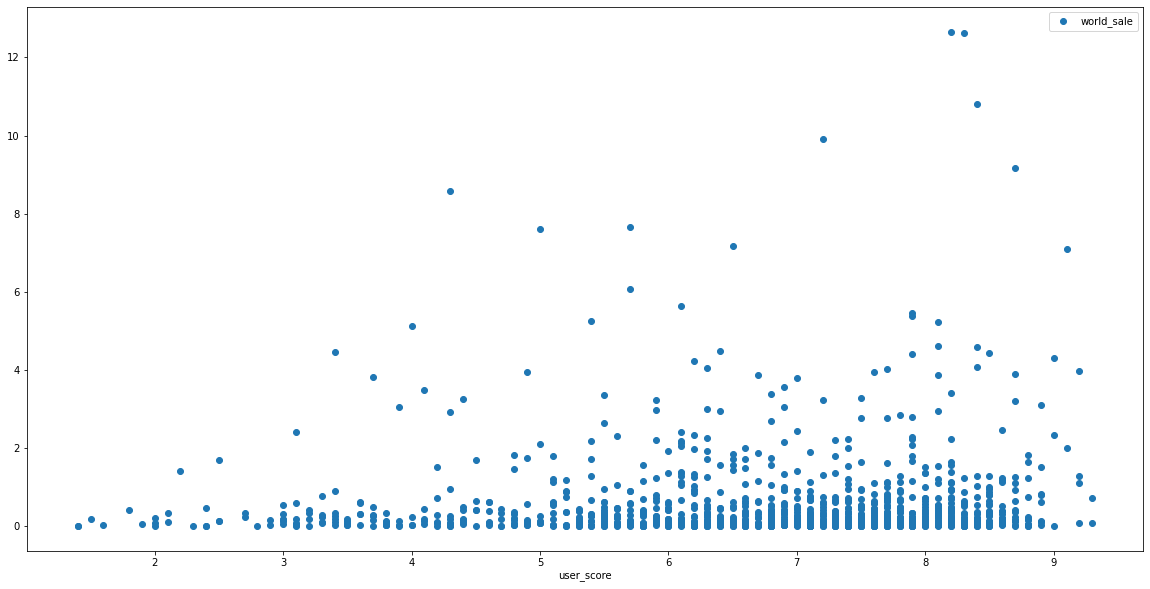

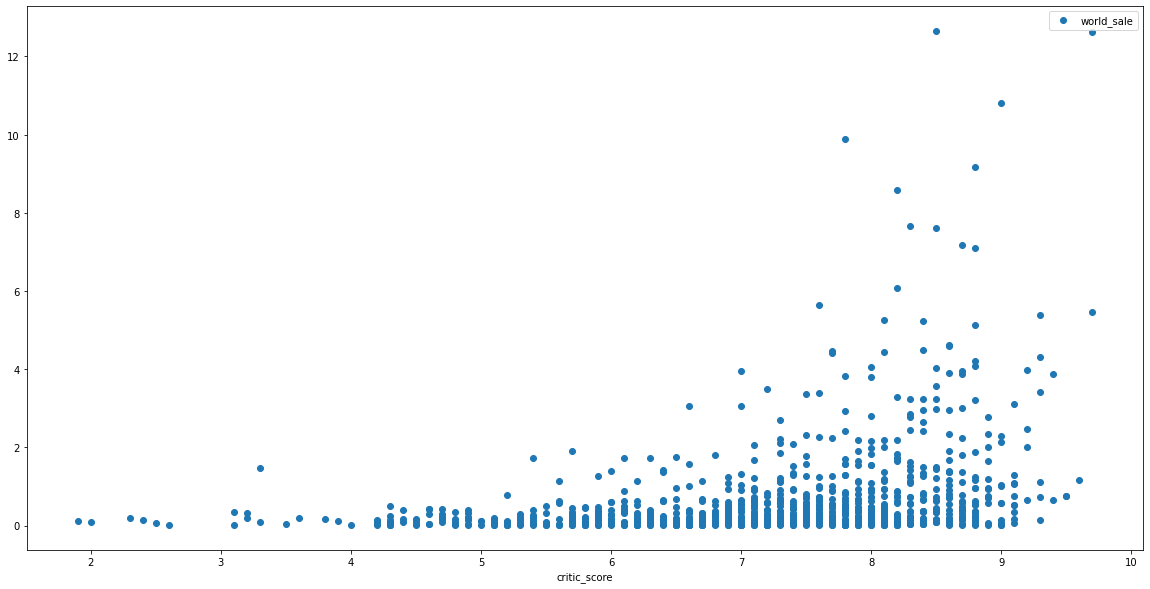

In [57]:
rev_data_game.query('user_score != 0').plot(x = 'user_score', y = 'world_sale', figsize=(20,10), style='o')
rev_data_game.query('critic_score != 0').plot(x = 'critic_score', y = 'world_sale', figsize=(20,10), style='o')
# Пропуски в данных были заменены "0", поэтому были отброшены, для большей наглядности.

Чем выше оценка, тем выше показатель продаж.

In [58]:
#rev_data_game.pivot_table(index='platform', values='world_sale', aggfunc='sum').plot(figsize=(20,10))
#plt.title('Распределение продаж для различных платформ')

Проажи на "PS4" самые большие, затем идет "3DS" и "XOne".


In [59]:
pl_us_s = rev_data_game.query('user_score != 0')

Text(0.5, 1.0, 'Влияние оценок пользователей на продажи игр в рамках платформы PS4')

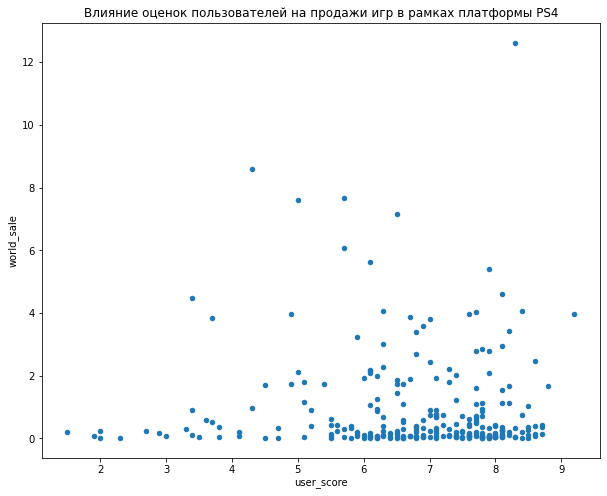

In [60]:
pl_us_s.query('platform == "PS4"').plot(x = 'user_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок пользователей на продажи игр в рамках платформы PS4')

Колличесво продаж игр на PS4 с оценками от 6 до 9, составляют большую часть. Колличесво продаж растет с увелечением оценки. 

Text(0.5, 1.0, 'Влияние оценок пользователей на продажи игр в рамках платформы XOne')

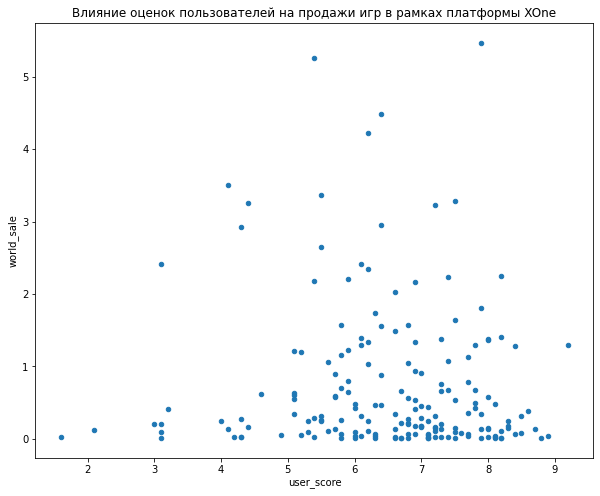

In [61]:
pl_us_s.query('platform == "XOne"').plot(x = 'user_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок пользователей на продажи игр в рамках платформы XOne')

Колличесво продаж игр на XOne с оценками от 5 до 9, составляют большую часть. Колличесво продаж растет с увелечением оценки.

Text(0.5, 1.0, 'Влияние оценок пользователей на продажи игр в рамках платформы 3DS')

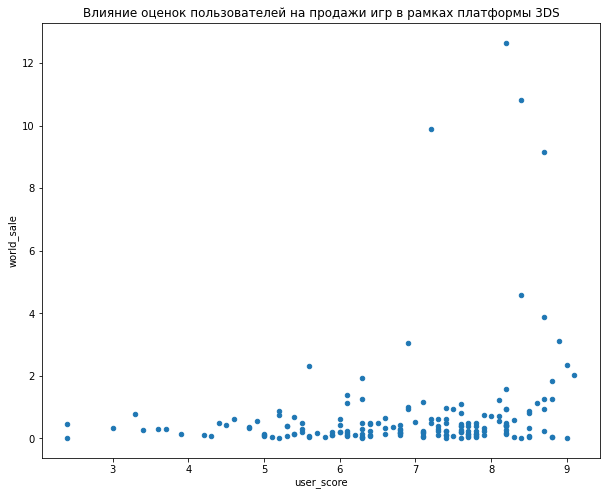

In [62]:
pl_us_s.query('platform == "3DS"').plot(x = 'user_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок пользователей на продажи игр в рамках платформы 3DS')

Колличесво продаж игр на 3DS с оценками от 5 до 9, составляют большую часть. Колличесво продаж растет с увелечением оценки.

Text(0.5, 1.0, 'Влияние оценок пользователей на продажи игр в рамках платформы PC')

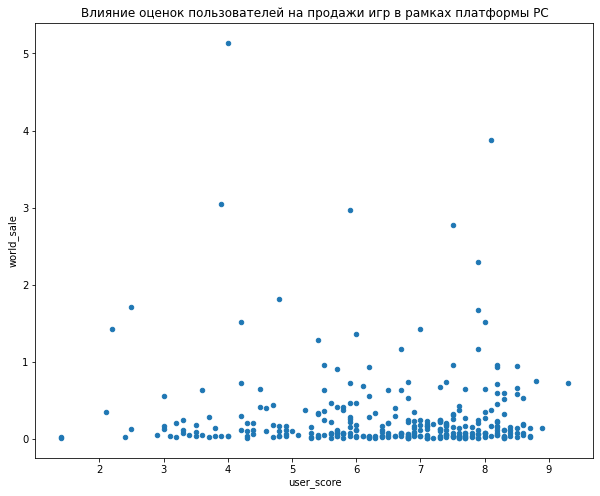

In [63]:
pl_us_s.query('platform == "PC"').plot(x = 'user_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок пользователей на продажи игр в рамках платформы PC')

Колличесво продаж игр на PC с оценками от 3 до 9, составляют большую часть. Колличесво продаж растет с увелечением оценки.

**В целом, оценка пользователей от 5 и выше обеспечит игру хорошими продажами, но чем выше тем лучше.**

In [64]:
pl_us_s = rev_data_game.query('critic_score != 0')

Text(0.5, 1.0, 'Влияние оценок критиков на продажи игр в рамках платформы PS4')

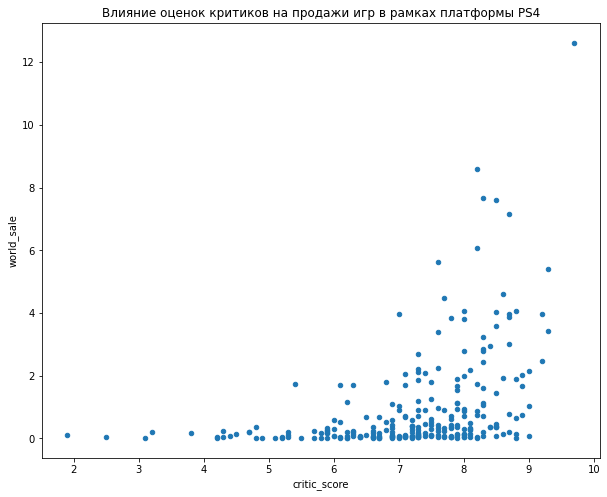

In [65]:
pl_us_s.query('platform == "PS4"').plot(x = 'critic_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок критиков на продажи игр в рамках платформы PS4')

Оценки расположены в диапозпоне от 7 до 9, продажи игры зависят от оценки критиков больше чем от оценки игроков.

Text(0.5, 1.0, 'Влияние оценок критиков на продажи игр в рамках платформы XOne')

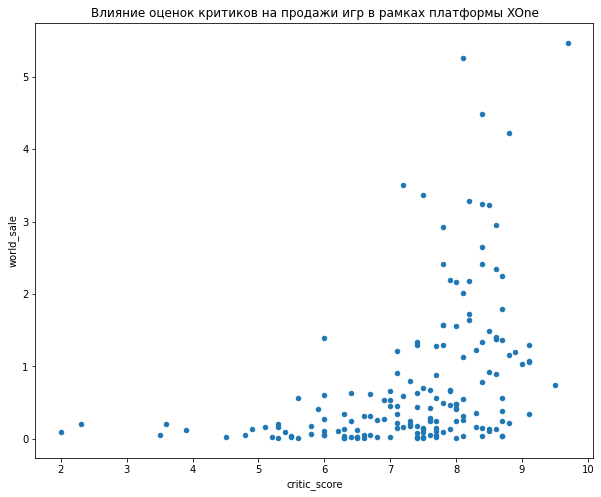

In [66]:
pl_us_s.query('platform == "XOne"').plot(x = 'critic_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок критиков на продажи игр в рамках платформы XOne')

Оценки расположены в диапозпоне от 7 до 9, продажи игры зависят от оценки критиков больше чем от оценки игроков.

Text(0.5, 1.0, 'Влияние оценок критиков на продажи игр в рамках платформы 3DS')

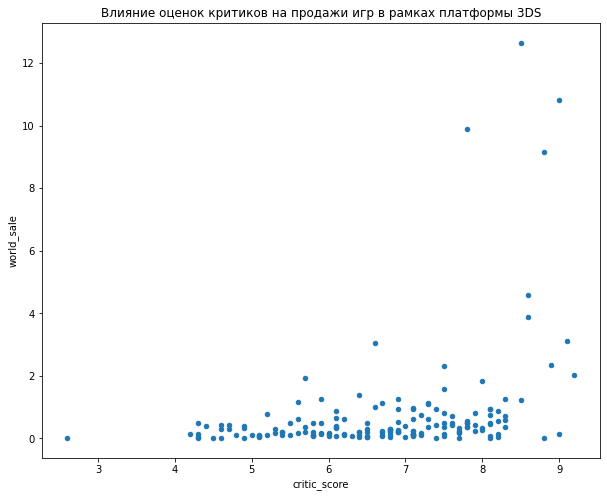

In [67]:
pl_us_s.query('platform == "3DS"').plot(x = 'critic_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок критиков на продажи игр в рамках платформы 3DS')

В основном оценки критиков сосредоточены от 4 и до 8. Критики оценивают игры на 3DS хуже чем на остальных платформах.

Text(0.5, 1.0, 'Влияние оценок критиков на продажи игр в рамках платформы PC')

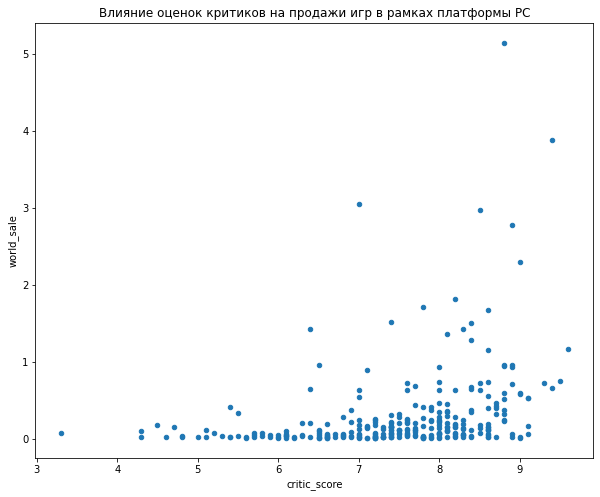

In [68]:
pl_us_s.query('platform == "PC"').plot(x = 'critic_score', y = 'world_sale',  kind='scatter', figsize=(10, 8))
plt.title('Влияние оценок критиков на продажи игр в рамках платформы PC')

С увелечением оценки от кроитиков, продажи растут.

**Вывод**

Для оценки критиков и игроков можно сказть, что увелечение оценки влияет на проажи, но есть и отличия, продажи с высокой оценки от критиков смещены ближе к высокой оценке. Игроков больше чем критиков, а чем больше людей, тем больше мнений.

**Рассмотрим жанры**

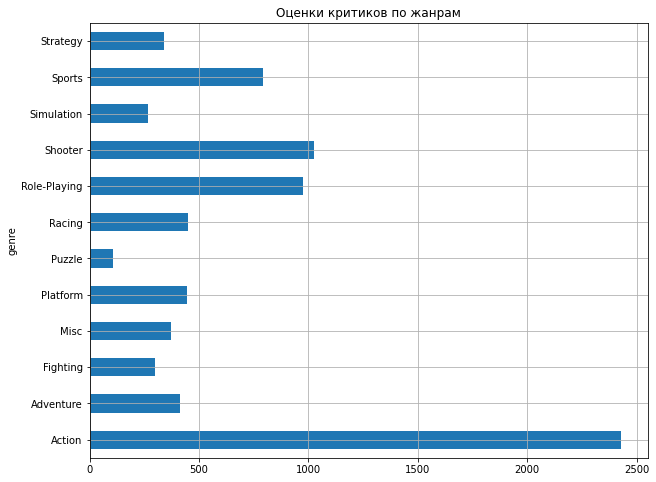

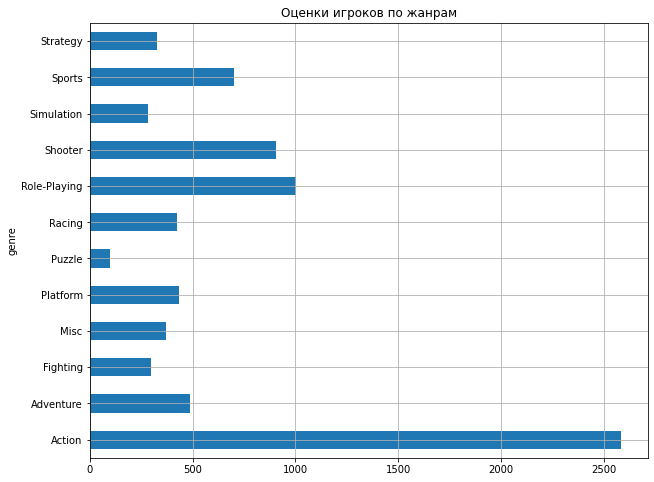

In [69]:
rev_data_game.groupby('genre')['critic_score'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Оценки критиков по жанрам')
plt.show()
rev_data_game.groupby('genre')['user_score'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Оценки игроков по жанрам')
plt.show()

Предпочтения критиков и игроков схожи, самыми популярными являются игры в жанре экшен, шутеры, ролевые игры и спортивные

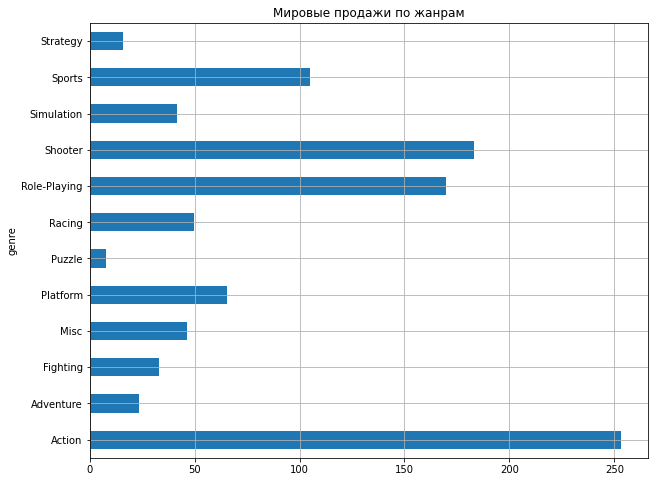

In [70]:
rev_data_game.groupby('genre')['world_sale'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Мировые продажи по жанрам')
plt.show()

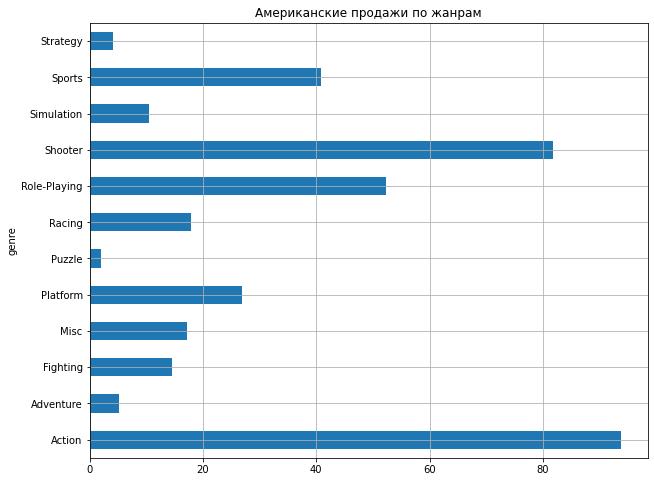

In [71]:
rev_data_game.groupby('genre')['na_sales'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Американские продажи по жанрам')
plt.show()

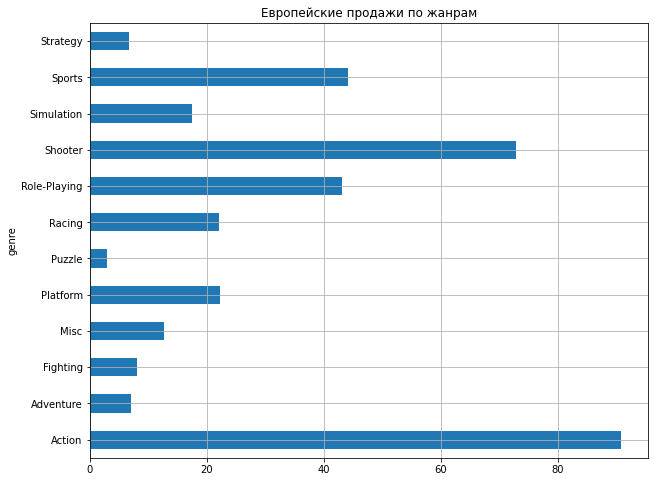

In [72]:
rev_data_game.groupby('genre')['eu_sales'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Европейские продажи по жанрам')
plt.show()

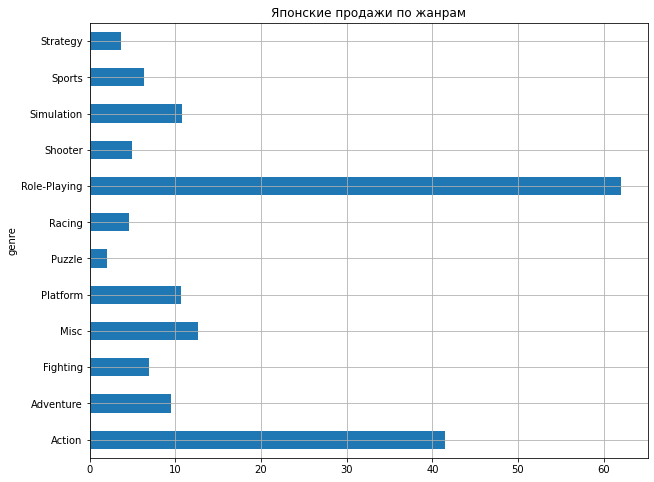

In [73]:
rev_data_game.groupby('genre')['jp_sales'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Японские продажи по жанрам')
plt.show()

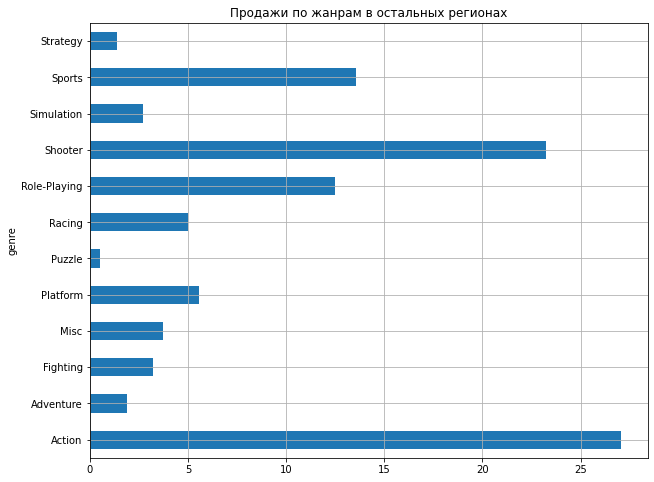

In [74]:
rev_data_game.groupby('genre')['other_sales'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Продажи по жанрам в остальных регионах')
plt.show()

Наиболее прибыльными являются игры с жанрами экшен, шутер, ролевые игры и спортивные. Ситуация похожа на оценки пользователей и критиков. Самая малая прибыль в жанре пазлов, игры с таки жанров условно простые, производство не занимает много времени и не требует большого бюджета. Игры в жанре стратегия самые не прибыльные в контектсе производсва, в отличии от пазлов они требуют много времени и большого бюджета.

Региональные предпочтения по жанрам практически не отличаются, за исключением Японии, там огромной популярность пользуются ролевые игры.

Text(0.5, 1.0, 'Оценки по жанрам на PS4 от пользователей')

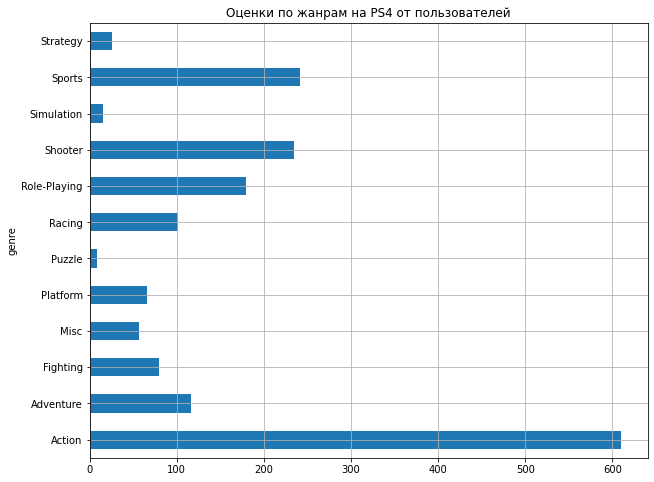

In [75]:
ps4_y.groupby('genre')['user_score'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Оценки по жанрам на PS4 от пользователей')

Text(0.5, 1.0, 'Оценки по жанрам на PS4 от критиков')

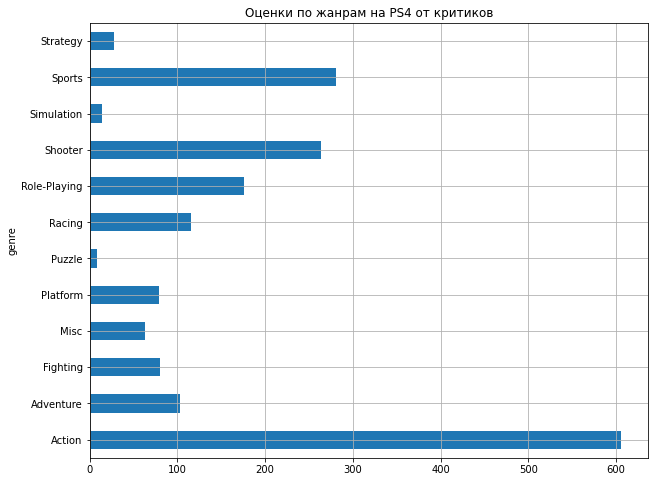

In [76]:
ps4_y.groupby('genre')['critic_score'].sum().plot(grid=True, kind='barh',figsize=(10, 8))
plt.title('Оценки по жанрам на PS4 от критиков')

Если рассматривать предпочтительные жанры для "PS4", то они почти не отличаются от мнения по всем платформам, но спортивные игры обладают большей популярностью.

**Рассмотрим оценки  самых популярных жанров по годам**

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Action по годам')

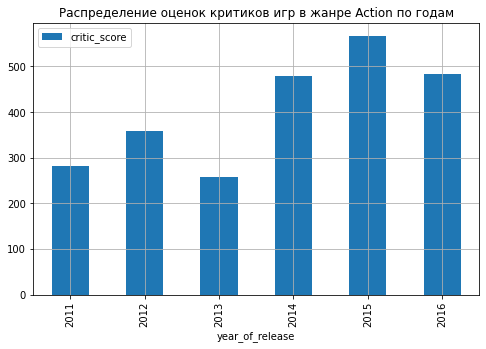

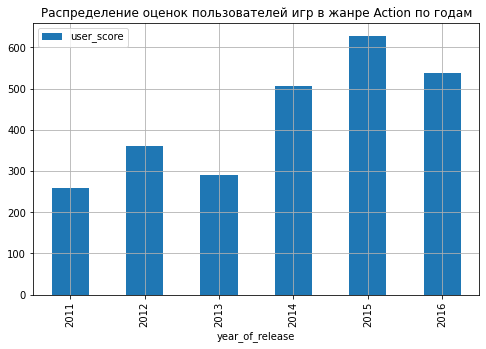

In [77]:
rev_data_game.query('genre=="Action"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок критиков игр в жанре Action по годам')

rev_data_game.query('genre=="Action"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок пользователей игр в жанре Action по годам')

Экшены постепенно набирают популярность из года в год среди игроков и критиков.

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Shooter по годам')

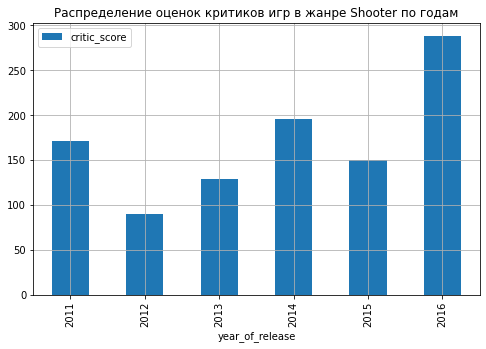

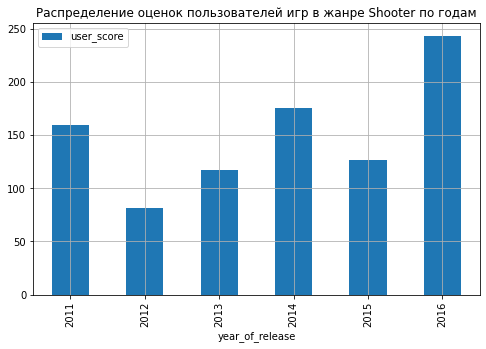

In [78]:
rev_data_game.query('genre=="Shooter"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок критиков игр в жанре Shooter по годам')

rev_data_game.query('genre=="Shooter"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок пользователей игр в жанре Shooter по годам')

Шутеры среди игроков и критиков имеют схожие оценки их популярность в насале падала, но после начала рост в 2013, с небольшим проиданием в 2015, несмотря на неполные данные за 2016 год их популярность очень велика.

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Role-playing по годам')

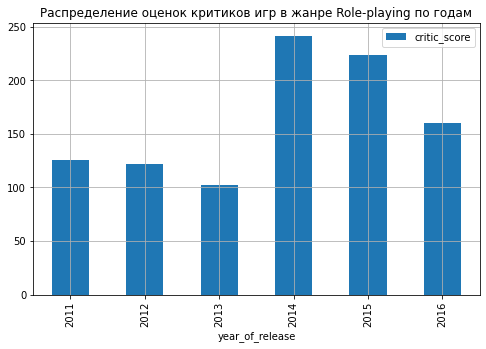

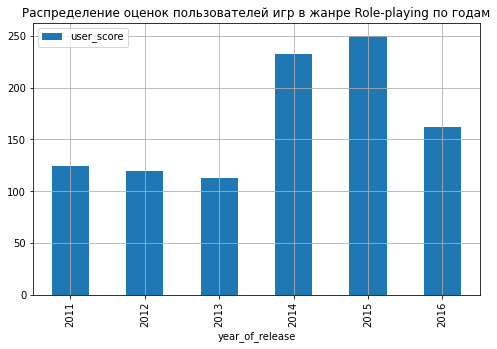

In [79]:
rev_data_game.query('genre=="Role-Playing"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок критиков игр в жанре Role-playing по годам')

rev_data_game.query('genre=="Role-Playing"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок пользователей игр в жанре Role-playing по годам')

Ролевые игры постепенно теряли свою популярность до 2014 года, но после резко выросли на период с 2014 по 2015 включительно, после же началали терять популярность. Могу предположить что резкий рост связан с выходом какой либо игры (н/апример Ведьмак 3).

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Sports по годам')

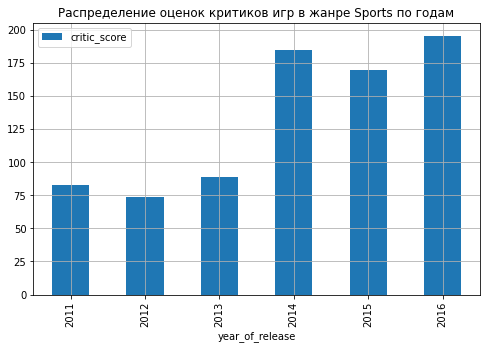

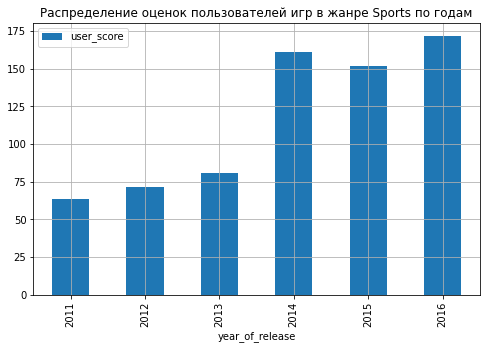

In [80]:
rev_data_game.query('genre=="Sports"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок критиков игр в жанре Sports по годам')

rev_data_game.query('genre=="Sports"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение оценок пользователей игр в жанре Sports по годам')

Игры в спортивном жанре, резко повысили свою популярность с 2014 года, не удивительно учитывая, что рост совпадает с новым поколением консолей, которые предлагали качественый рост в играх этого жанра. Из личного опыта могу сказать, что провести вечер игра в баскетбол на PS4 с товарищем, очень хорошее времяпровождение.

**Получается что популярность этих жанров вырасла за последние годы, стоит рассматривать их при планировании своей игры.**

# Шаг 4.

In [81]:
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,no_rating,31.38


In [82]:
def reg_sale(region):
    data_game.groupby('platform')[region].sum().plot(grid=True, kind='barh',figsize=(10, 8))
    plt.show()

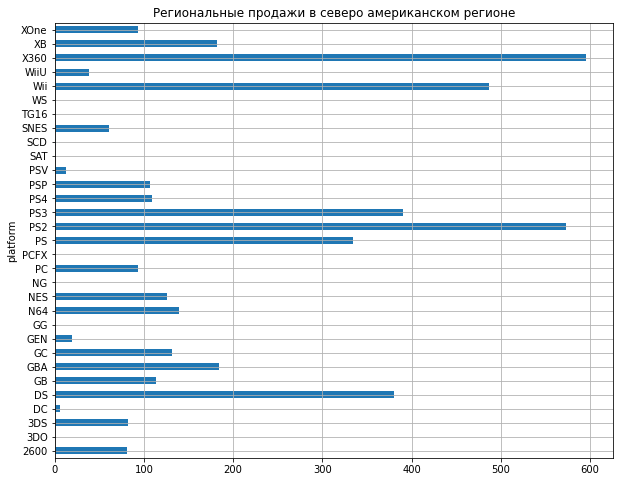

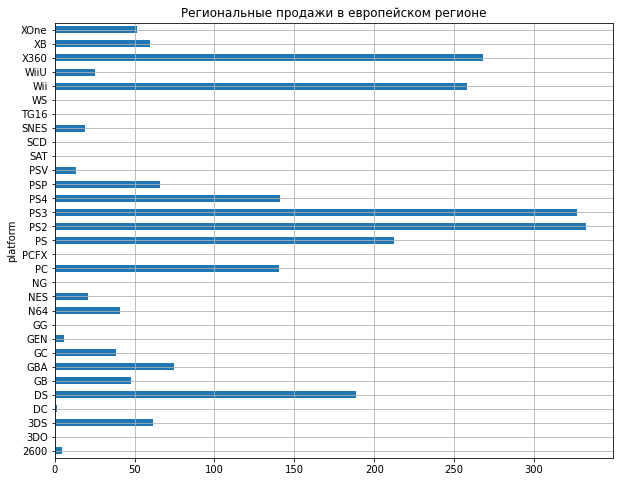

In [83]:
plt.title('Региональные продажи в северо американском регионе')
reg_sale('na_sales')
plt.title('Региональные продажи в европейском регионе')
reg_sale('eu_sales')

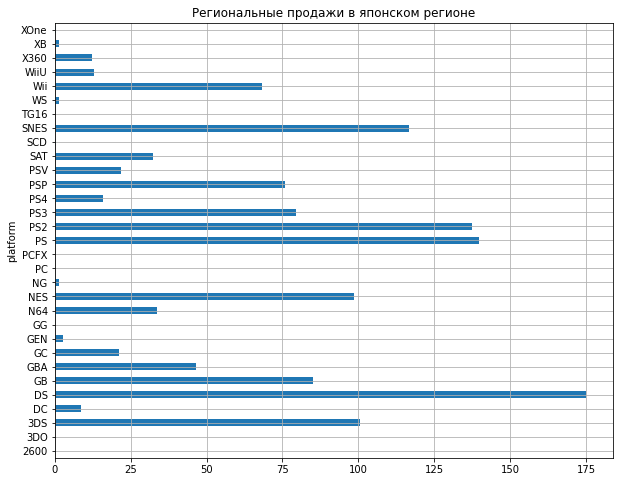

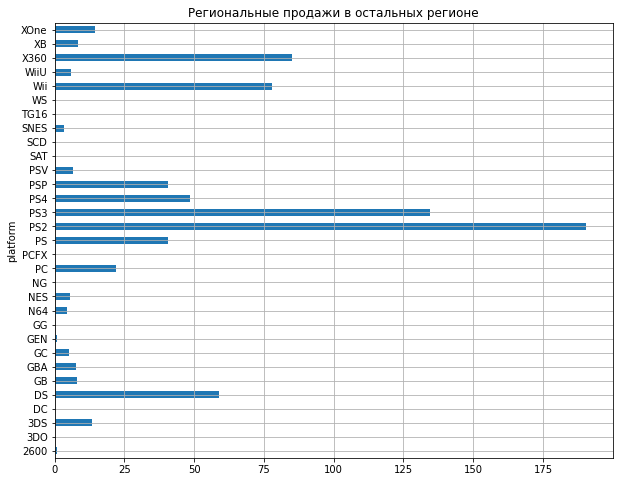

In [84]:
plt.title('Региональные продажи в японском регионе')
reg_sale('jp_sales')
plt.title('Региональные продажи в остальных регионе')
reg_sale('other_sales')

In [85]:
def reg_sale_t(region):
    w = data_game.groupby('platform')[region].sum().sort_values(ascending=False).head()
    display(w)

In [86]:
reg_sale_t('na_sales')
# Топ-5 платформ для северо американского региона.

platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

In [87]:
reg_sale_t('eu_sales')
# Топ-5 платформ для европейского региона.

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

In [88]:
reg_sale_t('jp_sales')
# Топ-5 платформ для японского региона.

platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64

In [89]:
reg_sale_t('other_sales')
# Топ-5 платформ для остальных регионов.

platform
PS2     190.47
PS3     134.59
X360     84.88
Wii      77.71
DS       59.04
Name: other_sales, dtype: float64

Во всех регионах одна из самых популярных консолей за все время является PS2, в америке самая популярная консоль Xbox 360, в японском регионе ожидаемо самые популярные консоли от японских компаний. 

In [90]:
def reg_sale_act(region):
    w = rev_data_game.groupby('platform')[region].sum().sort_values(ascending=False).head()
    rev_data_game.groupby('platform')[region].sum().plot(grid=True, kind='barh',figsize=(10, 8))
    display(w)
    plt.show()
    

platform
PS4     108.74
XOne     93.12
3DS      82.65
WiiU     38.10
PC       29.88
Name: na_sales, dtype: float64

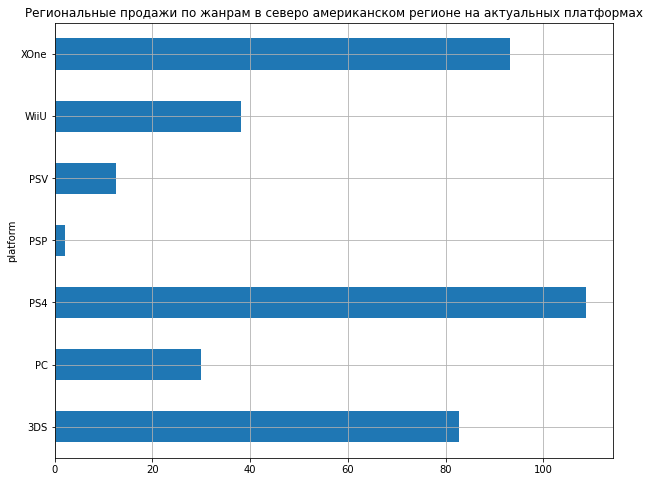

platform
PS4     141.09
3DS      61.27
PC       56.70
XOne     51.59
WiiU     25.13
Name: eu_sales, dtype: float64

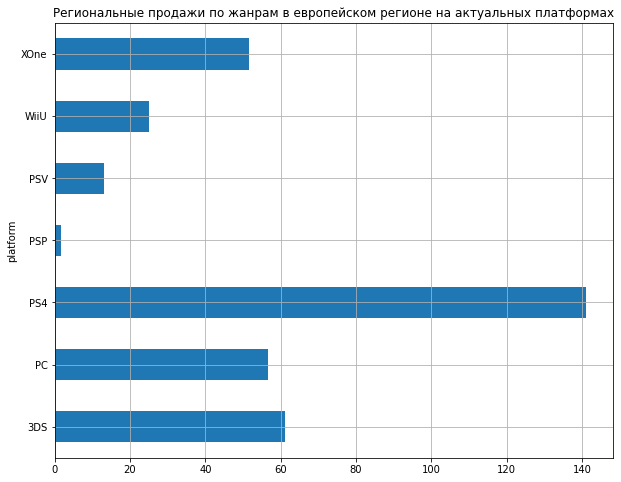

In [91]:
plt.title('Региональные продажи по жанрам в северо американском регионе на актуальных платформах')
reg_sale_act('na_sales')
plt.title('Региональные продажи по жанрам в европейском регионе на актуальных платформах')
reg_sale_act('eu_sales')

Из актуальных платформ самая популярная в Америке и Европе является PS4, на родине XOne на втором месте, в европе 3DS и XOne почти на одном уровне.

platform
3DS     100.62
PSP      24.04
PSV      21.84
PS4      15.96
WiiU     13.01
Name: jp_sales, dtype: float64

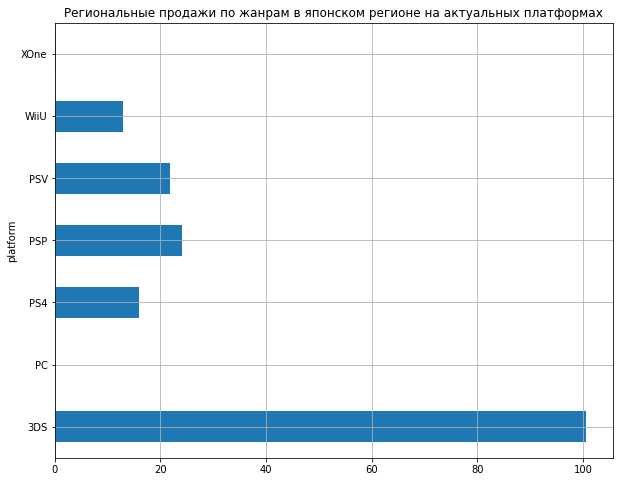

platform
PS4     48.35
XOne    14.27
3DS     13.27
PC      11.10
PSV      6.43
Name: other_sales, dtype: float64

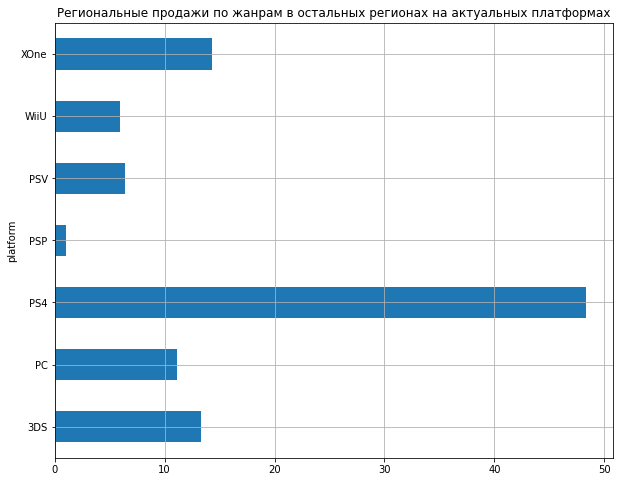

In [92]:
plt.title('Региональные продажи по жанрам в японском регионе на актуальных платформах')
reg_sale_act('jp_sales')
plt.title('Региональные продажи по жанрам в остальных регионах на актуальных платформах')
reg_sale_act('other_sales')

В Японии очень популярна консоль 3DS, во всех остальных регионах абсолютный лидер PS4 

**Влияние рейтинга ESRB**

In [93]:
data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,no_rating,31.38


Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра')

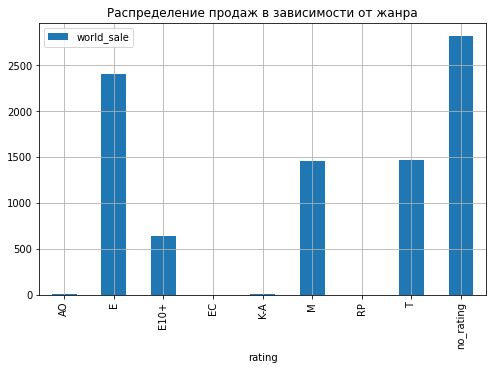

In [94]:
data_game.pivot_table(index='rating', values='world_sale', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра')

Большую популярность сыскали игры без рейтинга и рейтингом "E". Игры без рейтинга скорее всего не подавали заявление на присвоения рейтинга либо были выпущены до создания ESRB, так же возможно рейтинг еще не присвоен или вызван ошибкой в выгрузке данных.

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра в северо американском регионе')

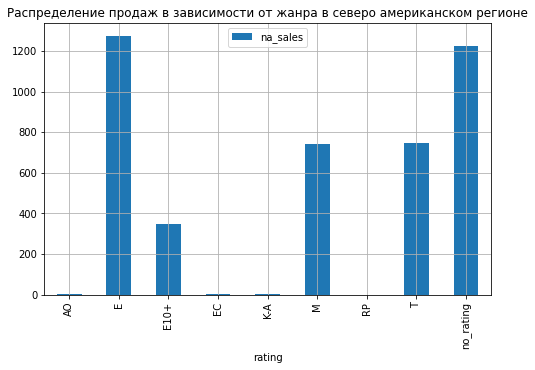

In [95]:
data_game.pivot_table(index='rating', values='na_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра в северо американском регионе')

В америке наиболее популярные игры категории "Е" и игры без рейтинга, также стоит ометить игры с рейтингом "М" и "Т" , они тоже обладают хорошей популярностью.

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра в европейском регионе')

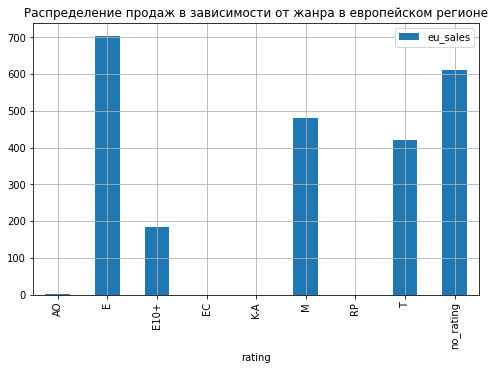

In [96]:
data_game.pivot_table(index='rating', values='eu_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра в европейском регионе')

В Европе ситуация схожа с американской

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра в японском регионе')

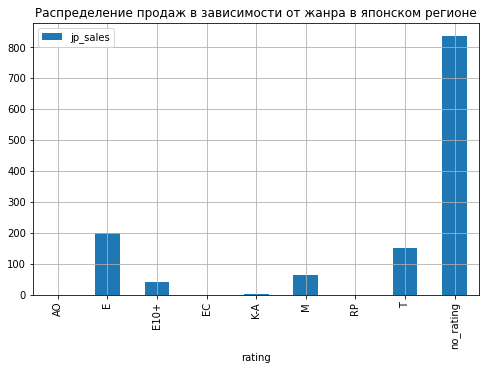

In [97]:
data_game.pivot_table(index='rating', values='jp_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра в японском регионе')

Япония самобытная страна и у нее очень развит рынок видеоигр, очень много игр японских издателей не покидают пределы родной страны и это может разъяснять причину большое колличесво игр без рейтинга, так как они по просту не проходят класификацию ESRB. 

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра в остальных регионах')

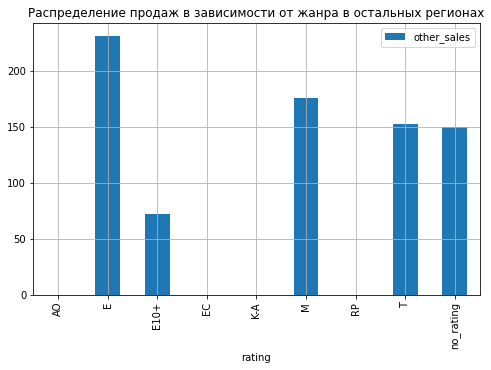

In [98]:
data_game.pivot_table(index='rating', values='other_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра в остальных регионах')

В остальных регионах наиболее популярны игры с категорией "Е" и "М".

Мы рассмотрели популярность жанров игр за все время, теперь рассмотрим более актуальные данные, которые мы вложили в переменную "rev_data_game" 

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра на актуальных платформах')

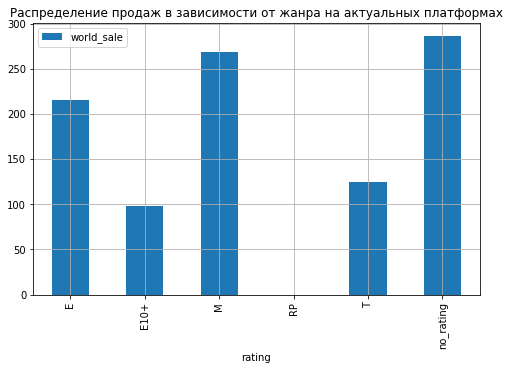

In [99]:
rev_data_game.pivot_table(index='rating', values='world_sale', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра на актуальных платформах')

Игры без рейтинга попрежнему занимаю лидирующие позиции, но в отличий от данных за все время, данные на актуальных платформах изменились, рейтинг "Е" стал менее востребован когда как ретинг "М" стал более популярным.

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра на актуальных платформах северо американского региона')

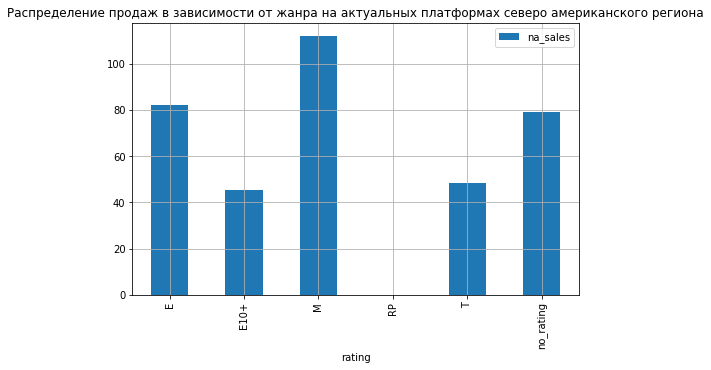

In [100]:
rev_data_game.pivot_table(index='rating', values='na_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра на актуальных платформах северо американского региона')

Популярным рейтингом на актуальных платформах в америке явлеятся "М", затем идет рейтинг "Е". 

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра на актуальных платформах европейского региона')

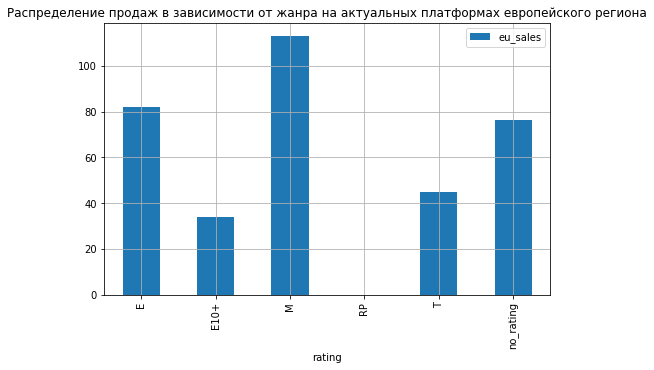

In [101]:
rev_data_game.pivot_table(index='rating', values='eu_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра на актуальных платформах европейского региона')

Как и с общими данными, на актуальных платформах европейского региона популярность рейтингов схожа с американски регионом. 

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра на актуальных платформах японского региона')

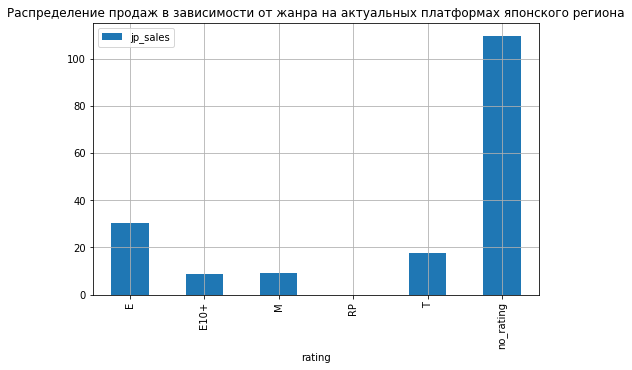

In [102]:
rev_data_game.pivot_table(index='rating', values='jp_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра на актуальных платформах японского региона')

На рынке Японии ситуация остается неизменной. 

Text(0.5, 1.0, 'Распределение продаж в зависимости от жанра на актуальных платформах остальных регионов')

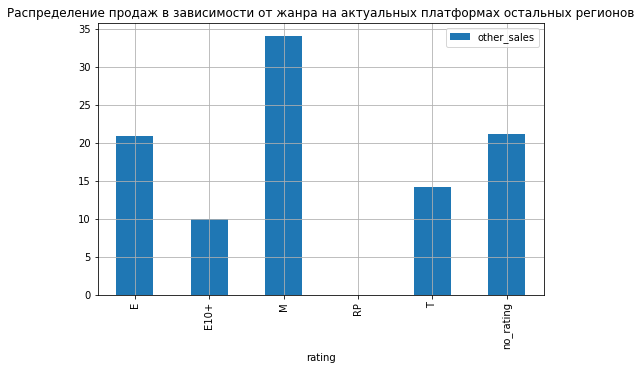

In [103]:
rev_data_game.pivot_table(index='rating', values='other_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(8, 5))
plt.title('Распределение продаж в зависимости от жанра на актуальных платформах остальных регионов')

В остальных регионах популярными рейтингами на актуальных платформах являются "М" и "Е" и игры без рейтинга

Несомненно рейтинг игры влияет на продажи в мире и отдельно взятом регионе, рейтинги "М"- для лиц старше 17 лет и рейтинг "Е"- для всех возрастов наиболее популярны. Японский рынок же отличается от мирового, как я писал ранее, игры в японии могли не проходить класификацию так как предназначены для внутренего рынка. Стоит отметить что сисетма рейтингов ESRB предназначена для  США, Мексики и Канады.  

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Корректный и глубокий анализ портретов пользователя, молодец, что обосновал различия в регионах.
    
</div>


# Шаг 5.

In [104]:
rev_data_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sale
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,no_rating,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,no_rating,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,8.5,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,no_rating,11.68


Гипотеза:

H0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

H1. Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [105]:
xbox_rating = rev_data_game.query('platform == "XOne" and user_score != 0')
pc_rating = rev_data_game.query('platform == "PC" and user_score != 0')

xbox_rating = xbox_rating['user_score']
pc_rating = pc_rating['user_score']
# Сгрупируем данные, в расчёт берем актуальные платформы.

In [106]:
#h00 = xbox_rating == pc_rating
#h01 = xbox_rating != pc_rating

alpha = 0.05 # значение уровня значимости выбрано 0.05 так как это общепринятое значение
results = st.ttest_ind(xbox_rating, pc_rating) #вызов метода для проверки гипотезы

print(results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.6267602271422398
Отвергаем нулевую гипотезу


Подтвердилась гипотеза H1. Средние пользовательские рейтинги платформ Xbox One и PC различны.

Гипотеза:

H0. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

H1. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [107]:
action_rating = rev_data_game.query('genre == "Action"').sort_index(axis=1)
sports_rating = rev_data_game.query('genre == "Sports"').sort_index(axis=1)

action_rating = action_rating['user_score']
sports_rating = sports_rating['user_score']

In [108]:
#h00 = action_rating['user_score'] == sports_rating['user_score']
#h01 = action_rating['user_score'] != sports_rating['user_score']

alpha = 0.05 # значение уровня значимости выбрано 0.05 так как это общепринятое значение
results = st.ttest_ind(action_rating, sports_rating) #вызов метода для проверки гипотезы

print(results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.04607195701382215
Не получилось отвергнуть нулевую гипотезу


Подтвердилась гипотеза H0. Средние пользовательские рейтинги жанров Action и Sports  одинаковы.

# Шаг 6.

Рынок видеоигр с годами медленно теряет обороты, это закномерно, так как игры на мобильных устроиствах приносят больше денег и требуют меньших вложений.

Именно по этой причине элементы присущие мобильной платформе, такие как free to play и микротранзакции все чаще проникают на тратиционные платформы.

Подход к играм стал более осторожным, для этого и проводятся подобные иследования, чтобы будущая игра имела больше шансов стать успешной.

Средний цикл жизни платформы составляет 10 лет, технологии не стоят на месте и поэтому выпускаются более совершенные версии.

Текущий актуальный период был выбран с 2011 года по н.в, так как он включает в себя платформы которые находятся в производсве и их поддержка не прекращена.

Потенциально прибыльными платформами можно назвать PS4 и Xone, в мире они самые популярные, но стоит учитывать и региональные особености, так например в Японии лидирует 3DS.

Отзывы критиков и игроков, действительно влияют на продажи, высоко оцененая игра заработает больше.

Самыми прибыльными жанрами являются Экшены, шутеры и ролевые игры. Если мы возьмем самую популярную платформу, то заметим, что список популярных жанров изменится вместо ролевых игр будут спортивные игры. Поэтому стоит тщательно обдумывать, стоит ли игра свеч, планируя выпустиь игру на той или иной платформе.

Пользователи разных регионов имеют свои предпочтения в жанрах если американцы и европейцы схожи в своих интересах, то пользователи японии отличаются своей самобытностью и здесь у них большой популярностью пользуются ролевые игры. 

Стоит учесть при производсве видеоигры и критерии возрастных ограничений, если раньше все играли в игры рейтинга "E", то с годами аудитория выросла и теперь самыми успешными являются категории "M" и "Е". Игры без категории встречаются в данных, возможно это игры выпускаемые вне действия ESRB(США, Канада, Мексика). 

Рынок видеоигр уже достаточно давно развивается и изменяется подстать требованиям времени. С уменьшением колличесва продаж по сравнению с прошлыми годами, разработчки не идут на эксперементы и тщательно планируют свои проекты, тенденция в увелечении игр популярных жанров будет продолжаться, менее популярные жанры уйдут в тень, так же под влиянием основных регионов игры будут делаться для них, не учитывая специфику отдельно взятого региона, который приносит меньшую прибыль(логично). 

В целом тенденция сохранится и в 2017-ом году, популярные жанры только укрепятся, а текущие платформы продолжат рост, и лишь за пару лет перед выходом следущего поколения начнут спад.